In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/btcind.csv')
df

,Date,open,high,low,close,volume,sma,ema,wma,hma,...,macd_macd,macd_signal,obv,mfi,vwap,ichimoku_tenkan,ichimoku_kijun,ichimoku_senkou_span_a,ichimoku_senkou,ichimoku_chikou
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,NaN,457.334015,NaN,NaN,...,0.000000,0.000000,NaN,NaN,459.310008,NaN,NaN,NaN,NaN,390.414001
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,NaN,439.712223,NaN,NaN,...,-0.738007,-0.410004,-3.448320e+07,NaN,442.023698,NaN,NaN,NaN,NaN,400.869995
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,NaN,422.554069,NaN,NaN,...,-1.859626,-1.004111,-7.240290e+07,NaN,425.942045,NaN,NaN,NaN,NaN,394.773010
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,NaN,418.378125,NaN,NaN,...,-1.814822,-1.278742,-3.553930e+07,NaN,420.686158,NaN,NaN,NaN,NaN,382.556000
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,NaN,413.275705,NaN,NaN,...,-2.153494,-1.538961,-6.211940e+07,NaN,417.431877,NaN,NaN,NaN,NaN,383.757996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,2025-09-02,109243.070312,111748.015625,108454.031250,111200.585938,74776999491,111714.377790,111582.181452,110680.690997,108413.794742,...,-1830.993233,-1445.736523,2.014111e+12,48.184703,45843.464936,110454.511719,115864.148438,116474.800781,110688.90625,NaN
4004,2025-09-03,111190.695312,112600.226562,110582.960938,111723.210938,61119643565,111532.125558,111600.985383,110681.868750,109069.525577,...,-1655.562284,-1487.701675,2.075231e+12,55.217196,45892.430245,110360.628906,115864.148438,116474.800781,110688.90625,NaN
4005,2025-09-04,111718.148438,112208.328125,109347.226562,110723.601562,60131132901,111411.023438,111484.000874,110574.065551,109703.435522,...,-1578.990495,-1505.959439,2.015100e+12,55.151680,45939.891787,110360.628906,115864.148438,115698.457031,110688.90625,NaN
4006,2025-09-05,110723.015625,113357.492188,110233.398438,110650.984375,60241647677,110966.516183,111372.932007,110472.727009,110275.312581,...,-1506.796983,-1506.126948,1.954858e+12,53.901257,45987.850182,110360.628906,115864.148438,116051.982422,110688.90625,NaN


In [ ]:
df.columns

Index(['Date', 'open', 'high', 'low', 'close', 'volume', 'sma', 'ema', 'wma',
       'hma', 'rsi', 'stoch', 'williams', 'cci', 'roc', 'mom', 'atr',
       'bollinger_bb_upper', 'bollinger_bb_middle', 'bollinger_bb_lower',
       'macd_macd', 'macd_signal', 'obv', 'mfi', 'vwap', 'ichimoku_tenkan',
       'ichimoku_kijun', 'ichimoku_senkou_span_a', 'ichimoku_senkou',
       'ichimoku_chikou'],
      dtype='object')

Handling missing data

In [ ]:
df.isnull().sum()

,0
Date,0
open,0
high,0
low,0
close,0
volume,0
sma,13
ema,0
wma,13
hma,15


In [ ]:
df.isnull()

,Date,open,high,low,close,volume,sma,ema,wma,hma,...,macd_macd,macd_signal,obv,mfi,vwap,ichimoku_tenkan,ichimoku_kijun,ichimoku_senkou_span_a,ichimoku_senkou,ichimoku_chikou
0,False,False,False,False,False,False,True,False,True,True,...,False,False,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,True,False,True,True,...,False,False,False,True,False,True,True,True,True,False
2,False,False,False,False,False,False,True,False,True,True,...,False,False,False,True,False,True,True,True,True,False
3,False,False,False,False,False,False,True,False,True,True,...,False,False,False,True,False,True,True,True,True,False
4,False,False,False,False,False,False,True,False,True,True,...,False,False,False,True,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4005,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4006,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df = df.dropna()

In [ ]:
df

,Date,open,high,low,close,volume,sma,ema,wma,hma,...,macd_macd,macd_signal,obv,mfi,vwap,ichimoku_tenkan,ichimoku_kijun,ichimoku_senkou_span_a,ichimoku_senkou,ichimoku_chikou
77,2014-12-03,381.721985,383.026001,374.346008,375.010010,13340100,370.358928,374.541861,374.483391,380.644867,...,2.808156,2.519737,-7.333132e+07,62.740173,373.783379,376.577988,399.623489,351.479004,378.735001,312.670013
78,2014-12-04,375.717987,378.654999,367.759003,369.604004,14529600,371.199214,373.883472,374.382734,379.018448,...,2.170388,2.449867,-8.786092e+07,65.390670,373.770630,373.028000,400.602493,351.479004,373.077988,310.737000
79,2014-12-05,369.441986,379.191986,365.756012,376.854004,15181800,373.056787,374.279547,375.136706,377.496509,...,2.223193,2.404532,-7.267912e+07,75.688763,373.771845,373.028000,400.602493,351.776253,365.426498,320.192993
80,2014-12-06,376.756989,378.447998,370.945007,374.785004,7009320,374.618572,374.346942,375.367135,376.211367,...,2.074472,2.338520,-7.968844e+07,74.862414,373.775111,373.028000,400.602493,353.718758,365.426498,314.248993
81,2014-12-07,374.835999,376.291992,373.274994,375.095001,6491650,375.155858,374.446684,375.430659,375.394896,...,1.958996,2.262615,-7.319679e+07,73.891190,373.778626,376.678513,400.602493,353.919250,365.426498,315.032013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,2025-08-07,115030.054688,117676.906250,114279.710938,117496.898438,64051649681,116162.189732,115845.878646,115502.548140,114054.983898,...,278.051519,722.988113,2.293793e+12,34.447782,44316.485742,115431.894531,117517.707031,110823.884766,108571.339844,111200.585938
3978,2025-08-08,117505.500000,117689.203125,115917.460938,116688.726562,59713005166,116094.535714,115958.258368,115572.753051,115093.583278,...,329.874435,644.365377,2.234080e+12,43.382405,44370.329982,115431.894531,117517.707031,111171.224609,108867.886719,111723.210938
3979,2025-08-09,116678.273438,117906.609375,116363.835938,116500.359375,54004312429,115991.178013,116030.538502,115626.862872,116008.222935,...,351.690739,585.830449,2.180076e+12,43.724824,44419.064165,114925.207031,116471.707031,112992.244141,110688.906250,110723.601562
3980,2025-08-10,116497.718750,119320.710938,116485.164062,119306.757812,64755458694,115981.054129,116467.367744,116068.940179,117110.864732,...,588.647654,586.393890,2.244831e+12,44.373863,44478.578805,115632.257812,116471.707031,112992.244141,110688.906250,110650.984375


Create target variable


In [ ]:
df['Target'] = (df['close'].shift(-1) > df['close']).astype(int)

/tmp/ipython-input-40501447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = (df['close'].shift(-1) > df['close']).astype(int)


In [ ]:
df['Target']

,Target
77,0
78,1
79,0
80,1
81,0
...,...
3977,0
3978,0
3979,1
3980,0


Removing last row since we can't predict tomorrow

In [ ]:
df = df[:-1]

Define X and Y

In [ ]:
X = df.drop(['Target', 'Date', 'close'], axis = 1)
y = df['Target']

Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42,
                                                    shuffle = False)

Balanced Data

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

Target
1    1663
0    1459
Name: count, dtype: int64
Target
1    399
0    382
Name: count, dtype: int64


XG Boosting Classifier for binary classification

In [ ]:
#1 price goes up
#2 price goes down

In [ ]:
model = XGBClassifier(
    objective = 'binary:logistic',
    eval_metric = 'logloss',
    n_estimator = 200,
    max_depth = 7,
    learning_rate = 0.05,
    colsample_bytree = 0.8,
    subsample = 0.8,
)

model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:05:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=200, n_estimators=None,
              n_jobs=None, ...)

Making predictions

In [ ]:
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.5275

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.50      0.51       382
           1       0.54      0.56      0.55       399

    accuracy                           0.53       781
   macro avg       0.53      0.53      0.53       781
weighted avg       0.53      0.53      0.53       781



Confusion Matrix

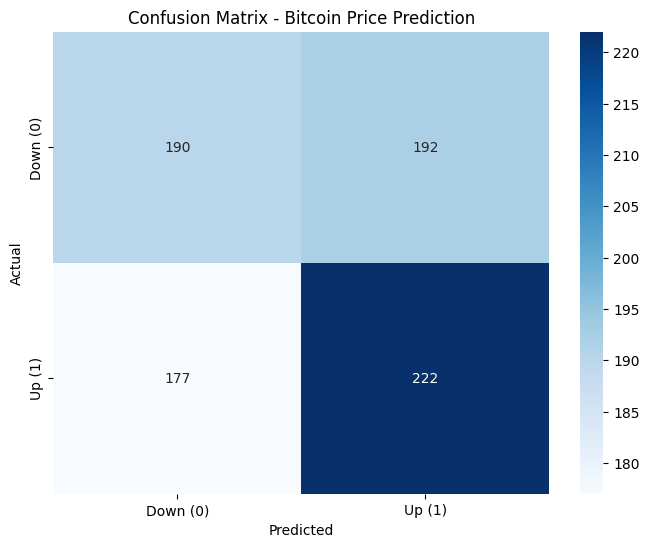

In [ ]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Down (0)', 'Up (1)'],
            yticklabels=['Down (0)', 'Up (1)'])
plt.title('Confusion Matrix - Bitcoin Price Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

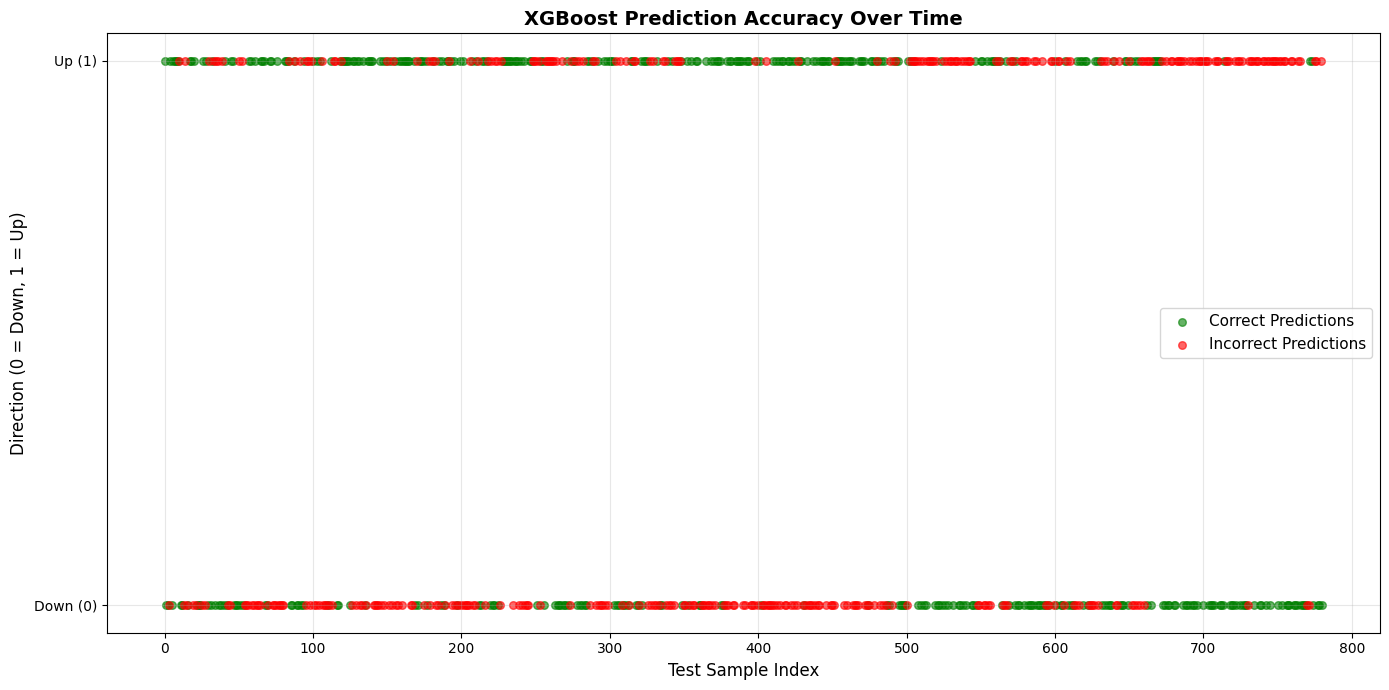

In [ ]:

# Create results dataframe
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': predictions,
    'Index': range(len(y_test))
})

# Scatter plot
plt.figure(figsize=(14, 7))

# Correct predictions (green)
correct = results_df[results_df['Actual'] == results_df['Predicted']]
incorrect = results_df[results_df['Actual'] != results_df['Predicted']]

plt.scatter(correct['Index'], correct['Actual'],
           color='green', alpha=0.6, s=30, label='Correct Predictions')
plt.scatter(incorrect['Index'], incorrect['Actual'],
           color='red', alpha=0.6, s=30, label='Incorrect Predictions')

plt.xlabel('Test Sample Index', fontsize=12)
plt.ylabel('Direction (0 = Down, 1 = Up)', fontsize=12)
plt.title('XGBoost Prediction Accuracy Over Time', fontsize=14, fontweight='bold')
plt.yticks([0, 1], ['Down (0)', 'Up (1)'])
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

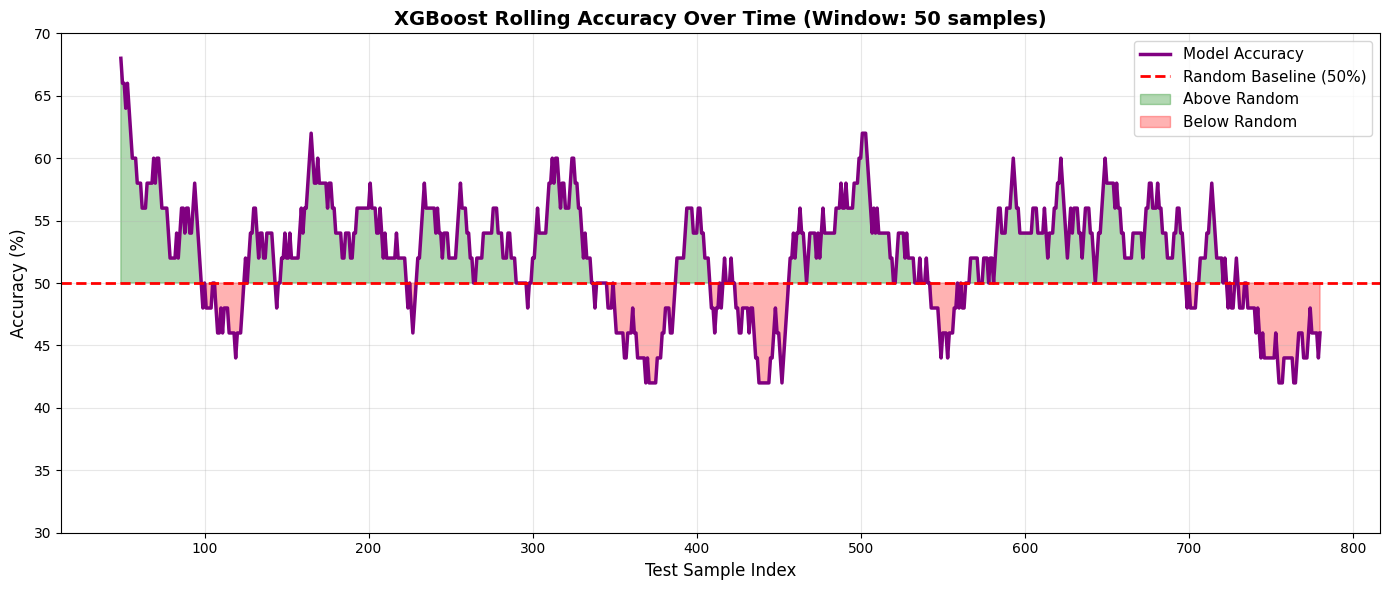

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create results dataframe
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': predictions,
    'Index': range(len(y_test))
})

# Calculate rolling accuracy
window_size = 50
results_df['Match'] = (results_df['Actual'] == results_df['Predicted']).astype(int)
results_df['Rolling_Accuracy'] = results_df['Match'].rolling(window=window_size).mean()

# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(results_df['Index'], results_df['Rolling_Accuracy'] * 100,
         color='purple', linewidth=2.5, label='Model Accuracy')
plt.axhline(y=50, color='red', linestyle='--',
            label='Random Baseline (50%)', linewidth=2)
plt.fill_between(results_df['Index'], 50, results_df['Rolling_Accuracy'] * 100,
                 where=(results_df['Rolling_Accuracy'] * 100 >= 50),
                 alpha=0.3, color='green', label='Above Random')
plt.fill_between(results_df['Index'], 50, results_df['Rolling_Accuracy'] * 100,
                 where=(results_df['Rolling_Accuracy'] * 100 < 50),
                 alpha=0.3, color='red', label='Below Random')

plt.xlabel('Test Sample Index', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title(f'XGBoost Rolling Accuracy Over Time (Window: {window_size} samples)',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.ylim(30, 70)
plt.tight_layout()
plt.show()


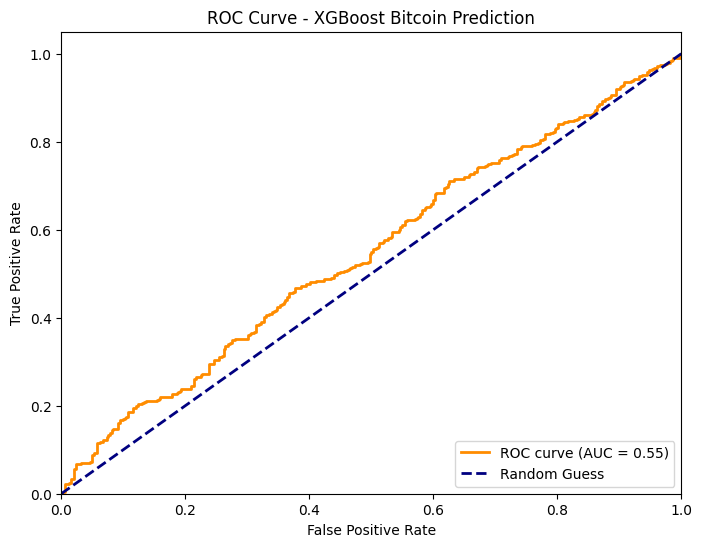

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities
y_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Bitcoin Prediction')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

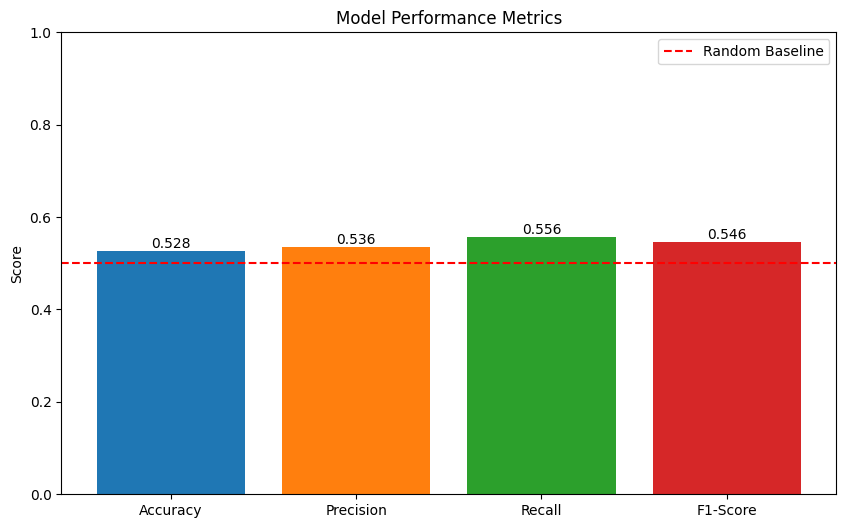

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
metrics = {
    'Accuracy': accuracy_score(y_test, predictions),
    'Precision': precision_score(y_test, predictions),
    'Recall': recall_score(y_test, predictions),
    'F1-Score': f1_score(y_test, predictions)
}

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.axhline(y=0.5, color='red', linestyle='--', label='Random Baseline')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom')
plt.legend()
plt.savefig('metrics_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()